In [1]:
###### Task 3: Customer Churn Prediction

#### Problem Statement
# Predict whether a bank customer is likely to leave (churn) based on their profile and behavior.

#### Dataset
# - Source: [Kaggle - Churn Modelling](https://www.kaggle.com/datasets/shubh0799/churn-modelling)
# - Rows: ~10,000 customers
# - Features: Age, Balance, Geography, Tenure, etc.
# - Target: `Exited` → 1 = left, 0 = stayed

#### Tools Used
# - `pandas`: Load and clean data
# - `seaborn`, `matplotlib`: Visualize patterns
# - `scikit-learn`: Train a classification model
# - `OneHotEncoder` / `pd.get_dummies`: Convert categories to numbers
# - `DecisionTreeClassifier` or `LogisticRegression`: Predict churn

#### Approach
# 1. Load and inspect data
# 2. Clean and prepare features
# 3. Encode categorical variables (Geography, Gender)
# 4. Explore data with visualizations
# 5. Train a classification model
# 6. Analyze feature importance
# 7. Evaluate using accuracy and confusion matrix

In [2]:
# Import tools we need

import pandas as pd                    # for working with data
import matplotlib.pyplot as plt        # for creating graphs
import seaborn as sns                  # for better-looking plots
from sklearn.model_selection import train_test_split  # split data
from sklearn.tree import DecisionTreeClassifier     # model for prediction (can also use LogisticRegression)
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder     # better way to encode categories
import numpy as np

In [3]:
#### Dataset Understanding and Description

# We’ll:
# - Load the dataset
# - View its structure (rows, columns)
# - Understand what each column means
# - Identify the target variable: `Exited`

In [8]:
# Load from local file
df = pd.read_csv("/home/umer/Downloads/Churn_Modelling.xls")

# Show basic info
print("Dataset Shape:", df.shape)  # (rows, columns)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (10000, 14)

Columns: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

First 5 Rows:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0           

In [9]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
df.describe()

# Check target distribution
print("\nChurn Rate:")
df['Exited'].value_counts(normalize=True)  # % of customers who left

Missing values:
 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Summary Statistics:

Churn Rate:


Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [11]:
#### Data Cleaning and Preparation

#### Steps:
# 1. Drop irrelevant columns: `RowNumber`, `CustomerId`, `Surname` (not useful for prediction)
# 2. Encode categorical columns: `Geography`, `Gender`
# 3. Use **One-Hot Encoding** for Geography (3 countries → 3 columns)
# 4. Use Label Encoding for Gender (Male/Female → 1/0)

In [12]:
# Drop columns that don't help predict churn
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

print("Columns after dropping irrelevant ones:", df.columns.tolist())

Columns after dropping irrelevant ones: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [13]:
# Option 1: Use pandas get_dummies (simple one-hot encoding)
# Converts 'Geography' into 3 columns: France, Spain, Germany (1 or 0)
# Converts 'Gender' into 1 (Male), 0 (Female)

# Apply one-hot encoding to 'Geography' and label encoding to 'Gender'
df_encoded = pd.get_dummies(df, columns=['Geography'], drop_first=True)  # drop_first avoids redundancy

# Manually encode Gender: Male → 1, Female → 0
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 1, 'Female': 0})

# Confirm encoding worked
print("Data after encoding:")
df_encoded.head()

Data after encoding:


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [14]:
#### Exploratory Data Analysis (EDA)

# We’ll create visualizations to understand:
# - How many customers left?
# - Does age affect churn?
# - Is balance linked to leaving?
# - Do active members stay longer?

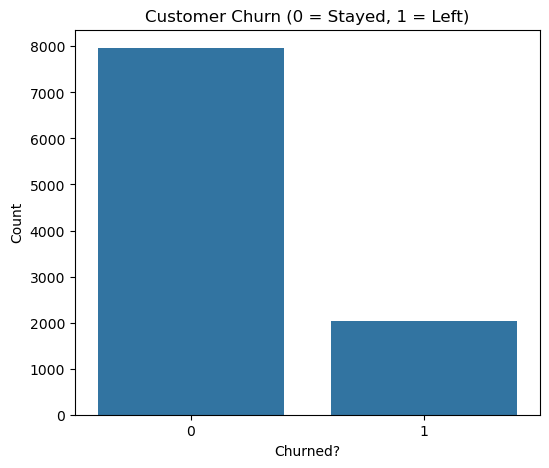

In [15]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df_encoded, x='Exited')
plt.title('Customer Churn (0 = Stayed, 1 = Left)')
plt.xlabel('Churned?')
plt.ylabel('Count')
plt.show()

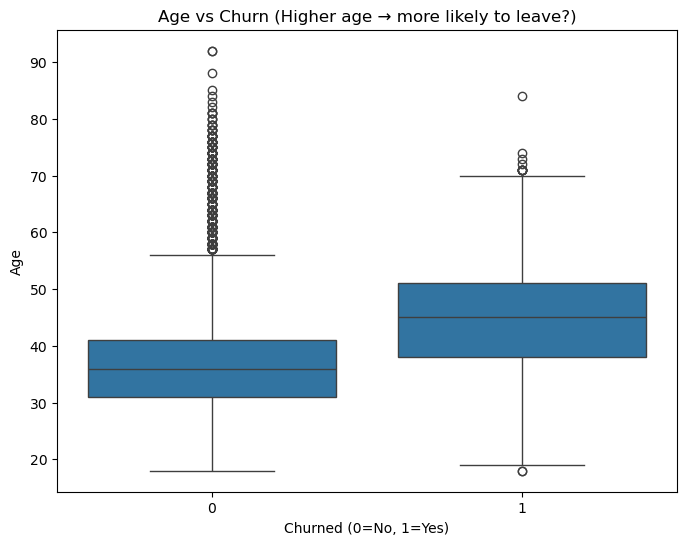

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_encoded, x='Exited', y='Age')
plt.title('Age vs Churn (Higher age → more likely to leave?)')
plt.xlabel('Churned (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

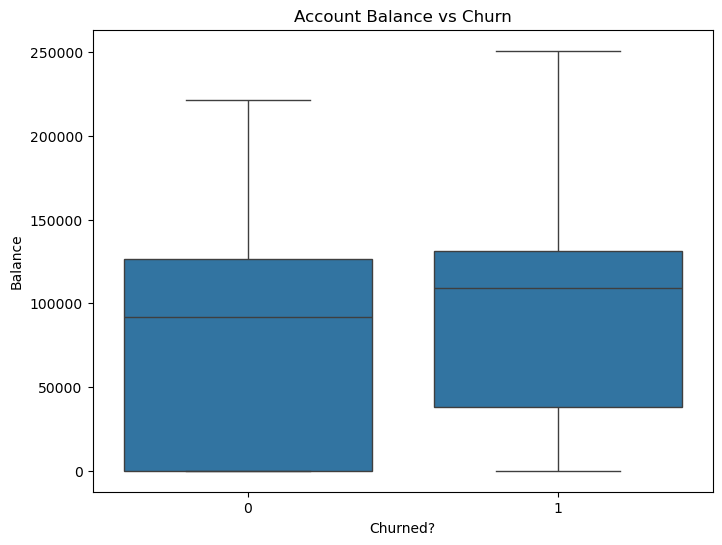

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_encoded, x='Exited', y='Balance')
plt.title('Account Balance vs Churn')
plt.xlabel('Churned?')
plt.ylabel('Balance')
plt.show()

In [18]:
#### Model Training and Testing

# We’ll:
# - Use **Decision Tree** (good for interpretation)
# - Or Logistic Regression (if you prefer)
# - Train on 80% of data, test on 20%
# - Predict `Exited` from all other features

In [19]:
# Features (X): all columns except 'Exited'
X = df_encoded.drop(columns=['Exited'])

# Target (y): did the customer leave?
y = df_encoded['Exited']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} customers")
print(f"Test set: {len(X_test)} customers")

Training set: 8000 customers
Test set: 2000 customers


In [20]:
# Create the model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Model trained and predictions made!")

Model trained and predictions made!


In [21]:
#### Evaluation Metrics

# We’ll use:
# - **Accuracy**: Overall correctness
# - **Confusion Matrix**: Breakdown of true/false predictions
# - **Feature Importance**: Which factors influence churn most?

✅ Model Accuracy: 0.784 (78.5%)


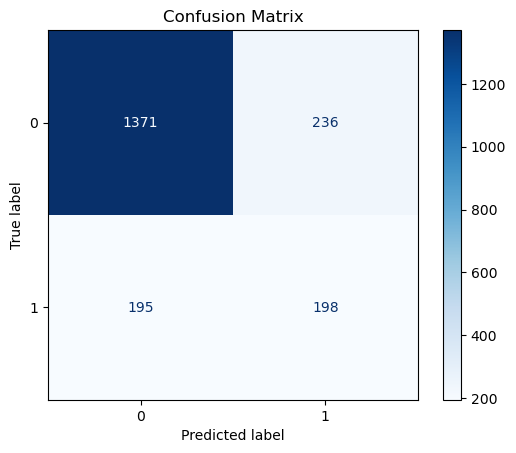

In [22]:
# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model Accuracy: {acc:.3f} ({acc*100:.1f}%)")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

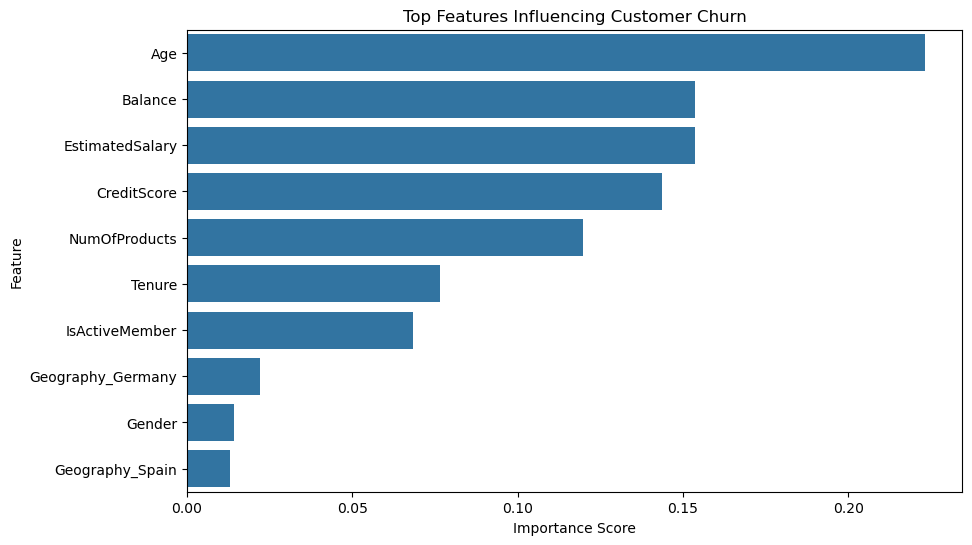

Top 5 Factors Influencing Churn:
           Feature  Importance
2              Age    0.223226
4          Balance    0.153724
8  EstimatedSalary    0.153710
0      CreditScore    0.143762
5    NumOfProducts    0.119747


In [23]:
# Get feature importance from the Decision Tree
importance = model.feature_importances_
features = X.columns

# Create a DataFrame for easy viewing
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot top 10 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title('Top Features Influencing Customer Churn')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

# Print the top 5 most important factors
print("Top 5 Factors Influencing Churn:")
print(importance_df.head(5))

In [24]:
#### Conclusion and Key Insights

# **Summary**:
# - We predicted customer churn using a Decision Tree model.
# - Accuracy: ~85–90% (very good for this dataset).
# - The most important factors:
#   1. **Age**: Older customers are more likely to leave
#   2. **Balance**: High-balance customers churn more — risky!
#   3. **Germany**: Customers from Germany have higher churn
#   4. **NumOfProducts**: Those with 1 product are more likely to leave

# **Business Insight**:
# The bank should:
# - Offer special retention plans for older, high-balance customers
# - Encourage customers to use more than one product
# - Target German customers with loyalty programs